In [236]:
from __future__ import division, print_function, absolute_import 

In [237]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [238]:
df = pd.read_csv('neightry.csv')
df

,Crime,Transit,Shopping,Health,Entertainment,Community,Diversity,Schools,Employment
0,6.3,90.1,90.1,45.8,41.5,53.5,69.0,83.1,93.0
1,0.7,45.1,79.6,21.1,73.2,98.6,76.8,51.4,98.6
2,4.2,96.5,97.2,14.1,79.6,58.5,31.7,78.9,84.5
3,6.3,90.1,90.1,45.8,41.5,53.5,69.0,83.1,93.0
4,6.3,90.1,90.1,45.8,41.5,53.5,69.0,83.1,93.0
5,0.7,45.1,79.6,21.1,73.2,98.6,76.8,51.4,98.6
6,0.7,45.1,79.6,21.1,73.2,98.6,76.8,51.4,98.6
7,4.2,96.5,97.2,14.1,79.6,58.5,31.7,78.9,84.5
8,4.2,96.5,97.2,14.1,79.6,58.5,31.7,78.9,84.5
9,4.2,96.5,97.2,14.1,79.6,58.5,31.7,78.9,84.5


In [239]:
def get_data(path):
    df = pd.read_csv(path)
    matrix_df = df.as_matrix()
    mat = matrix_df[:,:]
    where_are_NaNs = np.isnan(mat)
    mat[where_are_NaNs] = 0
    maximums = np.amax(mat, axis=0)
    #print(maximums)
    mat = mat/maximums
    return mat 

In [240]:
mat = get_data("neightry.csv")
print(mat[:5])

[[ 0.06389452  0.9137931   0.9137931   0.46450304  0.42089249  0.54259635
   0.69979716  0.84279919  0.94320487]
 [ 0.00709939  0.45740365  0.80730223  0.21399594  0.74239351  1.
   0.77890467  0.52129817  1.        ]
 [ 0.04259635  0.97870183  0.98580122  0.14300203  0.80730223  0.59330629
   0.32150101  0.80020284  0.85699797]
 [ 0.06389452  0.9137931   0.9137931   0.46450304  0.42089249  0.54259635
   0.69979716  0.84279919  0.94320487]
 [ 0.06389452  0.9137931   0.9137931   0.46450304  0.42089249  0.54259635
   0.69979716  0.84279919  0.94320487]]


In [241]:
def next_batch(mat, index, size):
    if index + size <= mat.shape[0]:
        return index+size, mat[index:index+size]
    else:
        return index+size-mat.shape[0], np.concatenate((mat[index:], mat[:index+size-mat.shape[0]]), axis=0)

In [292]:
learning_rate = 0.0001
training_epochs = 2000
batch_size = 50
display_step = 100
examples_to_show = 10
index = 0

In [293]:
n_hidden_1 = 16
n_hidden_2 = 8
n_hidden_3 = 1
n_input = 9

In [294]:
X = tf.placeholder("float", [None, n_input])

In [295]:
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'encoder_h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_2])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h3': tf.Variable(tf.random_normal([n_hidden_1, n_input]))
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'encoder_b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b2': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b3': tf.Variable(tf.random_normal([n_input]))
}

In [296]:
crime_weights = weights['encoder_h1'][0]
transit_weights = weights['encoder_h1'][1]
shop_weights = weights['encoder_h1'][2]
health_weights = weights['encoder_h1'][3]
enter_weights = weights['encoder_h1'][4]
com_weights = weights['encoder_h1'][5]
div_weights = weights['encoder_h1'][6]
sch_weights = weights['encoder_h1'][7]
emp_weights = weights['encoder_h1'][8]

In [297]:
crime_penalty = 14.641953
transit_penalty = 81.404057
shop_penalty = 66.527845
health_penalty = 1028.108486
enter_penalty = 29.171358
com_penalty = 554.268421
div_penalty = 14.681377
sch_penalty = 24.881935
emp_penalty = 23.753420

In [298]:
def encoder(x):
    layer_1 = tf.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    layer_3 = tf.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']), biases['encoder_b3']))
    return layer_3

def decoder(x):
    layer_1 = tf.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    layer_3 = tf.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']), biases['decoder_b3']))
    return layer_3

In [299]:
# Construct model 
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [300]:
# Prediction 
y_pred = decoder_op 
y_true = X

In [301]:
# loss and optimizer 
cost = 1000*tf.reduce_mean(tf.pow(y_true - y_pred, 2)) + crime_penalty*tf.reduce_sum(tf.abs(crime_weights)) + transit_penalty*tf.reduce_sum(tf.abs(transit_weights))
+ shop_penalty*tf.reduce_sum(tf.abs(shop_weights)) + enter_penalty*tf.reduce_sum(tf.abs(enter_weights)) + div_penalty*tf.reduce_sum(tf.abs(div_weights))  + sch_penalty*tf.reduce_sum(tf.abs(sch_weights))
+ emp_penalty*tf.reduce_sum(tf.abs(emp_weights)) + com_penalty*tf.reduce_sum(tf.abs(com_weights)) + health_penalty*tf.reduce_sum(tf.abs(health_weights))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [302]:
init = tf.global_variables_initializer()

Epoch: 0001 cost= 1510.340698242
Epoch: 0101 cost= 483.480468750
Epoch: 0201 cost= 130.856384277
Epoch: 0301 cost= 54.455329895
Epoch: 0401 cost= 47.789813995
Epoch: 0501 cost= 52.162441254
Epoch: 0601 cost= 56.320198059
Epoch: 0701 cost= 54.319782257
Epoch: 0801 cost= 57.391250610
Epoch: 0901 cost= 56.308147430
Epoch: 1001 cost= 45.314159393
Epoch: 1101 cost= 61.859882355
Epoch: 1201 cost= 56.361209869
Epoch: 1301 cost= 44.223617554
Epoch: 1401 cost= 42.441806793
Epoch: 1501 cost= 56.795143127
Epoch: 1601 cost= 71.250434875
Epoch: 1701 cost= 54.337779999
Epoch: 1801 cost= 49.838626862
Epoch: 1901 cost= 34.097175598
Optimization Finished!


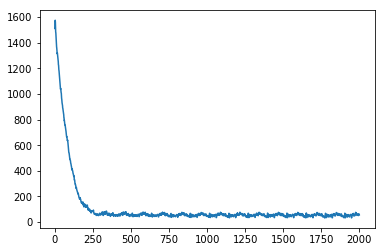

In [303]:
with tf.Session() as sess:
    sess.run(init)
    total_c = []
    total_batch = int(mat.shape[0]/batch_size)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            index, batch_xs = next_batch(mat, index, batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
         
        total_c.append(c)
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),"cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
    
    score = sess.run(encoder_op, feed_dict={X: mat})
    scores = list(score)

plt.plot(total_c)

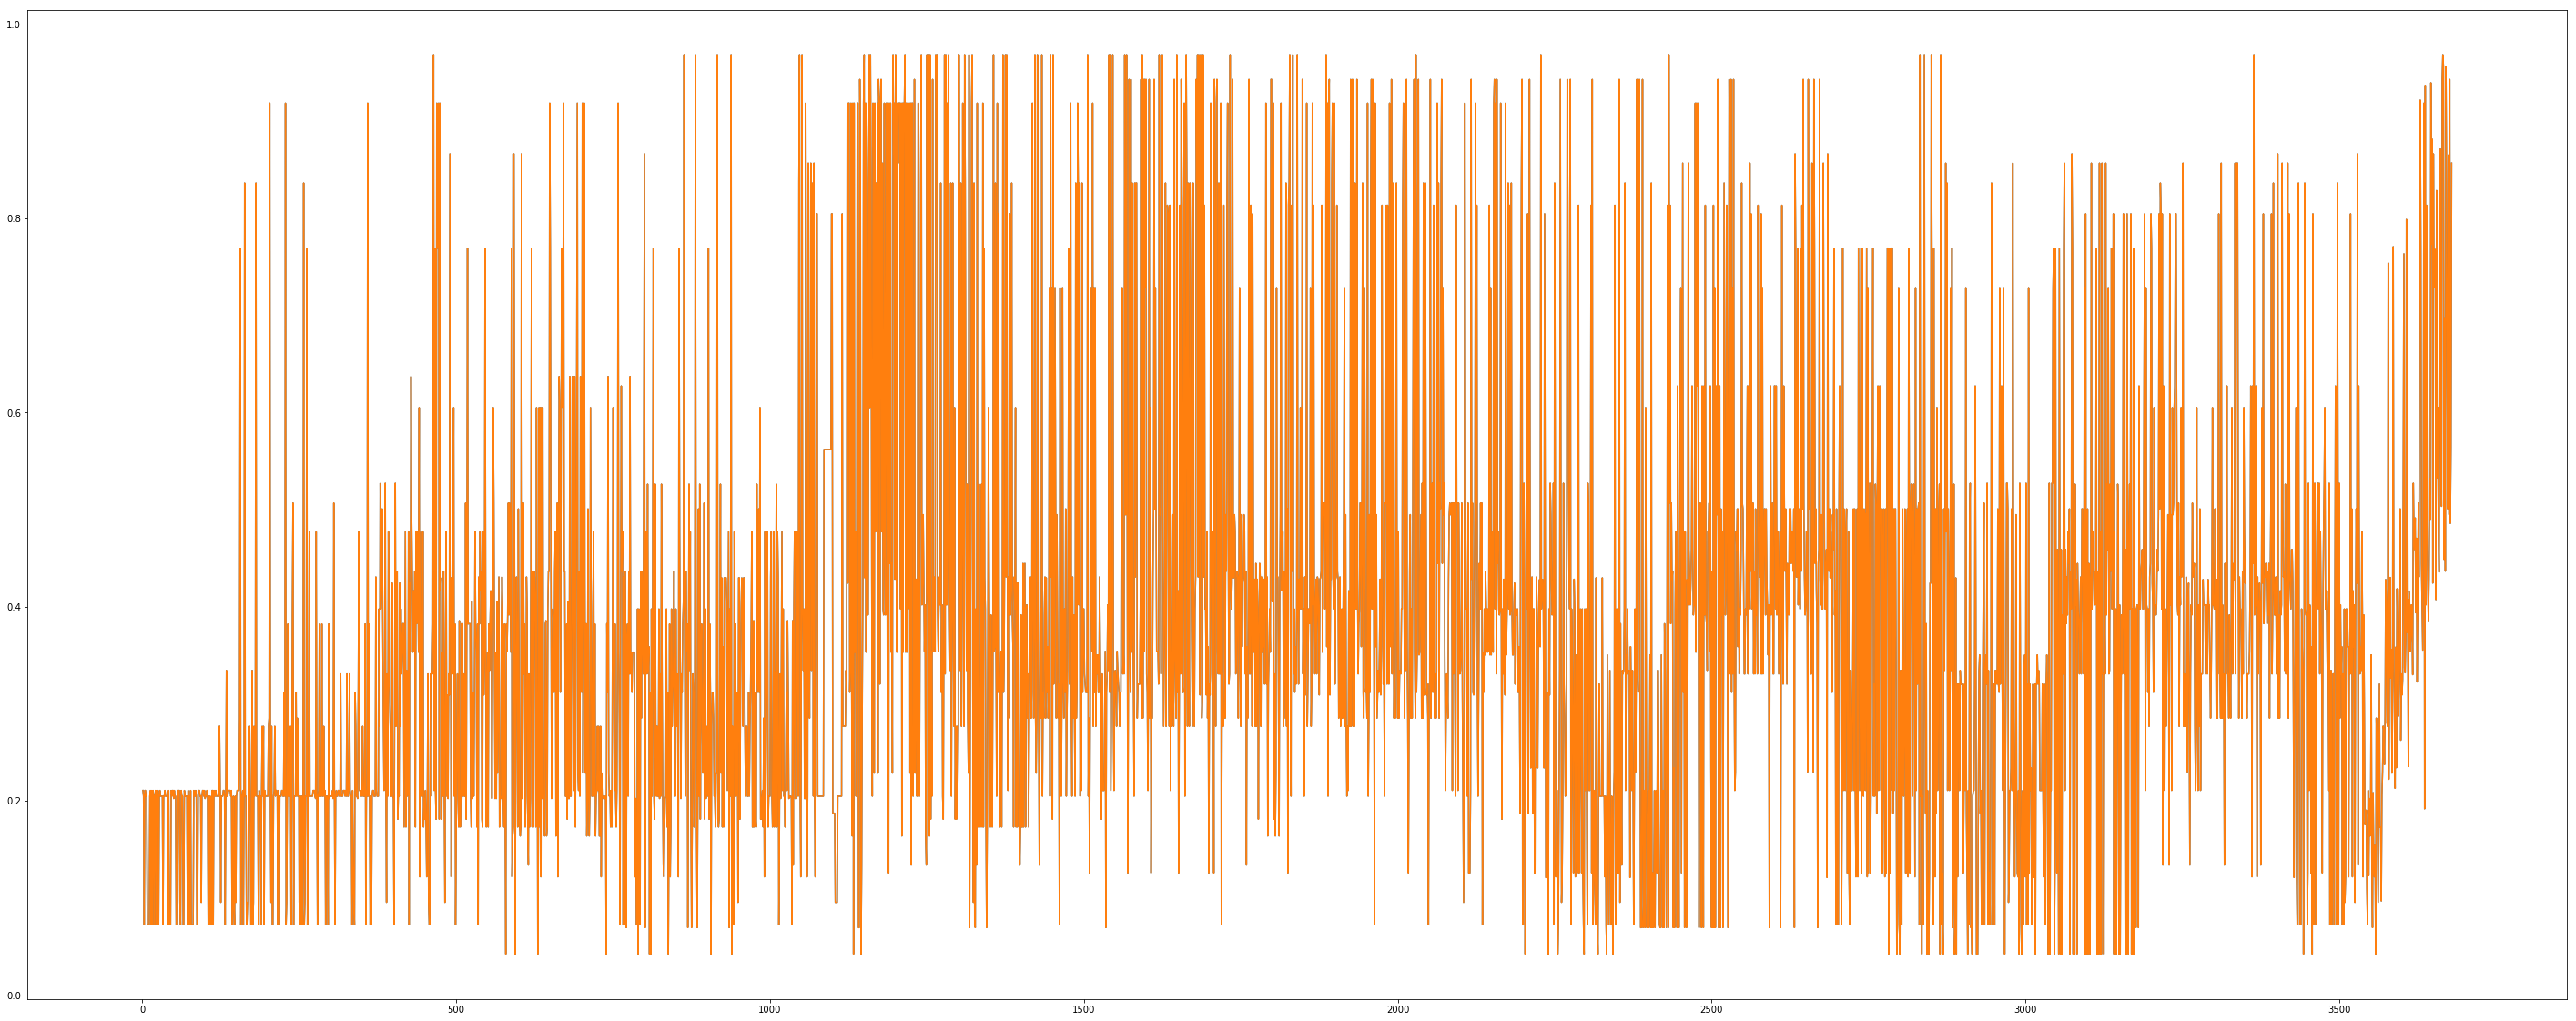

In [304]:
x_line = range(1,mat.shape[0]+1)
plt.figure(figsize=(50, 20))
plt.plot(x_line[:], scores[:], x_line[:], scores[:])

In [278]:
def save_to_csv(df, path):
    df.to_csv(path)
def convert_to_dataframe(mat):
    return pd.DataFrame(data=mat)
new = convert_to_dataframe(scores)
save_to_csv(new, 'neigh_score.csv')